In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
!python3 -m spacy download pt_core_news_lg
from tensorflow.keras import optimizers
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from transformers import pipeline
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import torch
import string
import nltk
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [109]:
classifier = pipeline("zero-shot-classification")
candidate_labels = ["testador", "suporte", "ferramenta"]

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [110]:
roberta = pipeline("ner", grouped_entities=True, model="joelniklaus/legal-portuguese-roberta-base")

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at joelniklaus/legal-portuguese-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [111]:
historias_usuario = [
    "Como Testador eu quero um jeito mais fácil de incluir os requisitos do aplicativo na ferramenta DRL-Mobtest para criar casos de teste que cubram tudo que o aplicativo precisa fazer, sem ter que gastar muito tempo escrevendo manualmente.",
    "Como Testador eu quero uma maneira de ensinar a ferramenta DRL-Mobtest a entender os requisitos do aplicativo usando NLP para fazer com que a ferramenta gere testes automaticamente.",
    "Como Testador eu quero que a ferramenta gere casos de teste abrangentes que cubram integralmente todos os requisitos do aplicativo, assegurando que o software seja completo e funcional, sem depender exclusivamente da criação manual de casos de teste.",
    "Como Testador eu quero que a ferramenta seja integrada com outras ferramentas de gerenciamento, permitindo sincronização automática dos requisitos e facilitando o processo de criação de casos de testes.",
    "Como Testador eu quero que a ferramenta  forneça o recurso de criação de relatórios detalhados sobre a cobertura dos testes, permitindo uma análise precisa sobre sua progressão e identificação das lacunas durante sua execução.",
    "Como testador, quero uma maneira mais fácil de incluir requisitos do aplicativo para criar casos de teste abrangentes, economizando tempo na escrita manual.",
    "Como testador, desejo ensinar a ferramenta a entender os requisitos do aplicativo usando NLP para gerar testes automaticamente.",
    "Como testador, preciso que a ferramenta gere casos de teste completos e funcionais que cubram todos os requisitos do aplicativo.",
    "Como testador, quero integração com outras ferramentas de gerenciamento para sincronizar automaticamente requisitos e facilitar a criação de casos de teste.",
    "Como testador, quero relatórios detalhados sobre a cobertura dos testes para análise precisa durante a execução.",
    "Como testador, desejo que a ferramenta identifique automaticamente os casos de teste mais críticos para priorizar a análise.",
    "Como testador, preciso que a ferramenta sugira casos de teste com base em padrões de uso real do aplicativo.",
    "Como testador, quero sugestões com base em padrões de falha históricos para evitar problemas recorrentes no software.",
    "Como testador, desejo suporte à execução de testes automatizados em diferentes dispositivos e ambientes.",
    "Como testador, preciso que a ferramenta detecte automaticamente mudanças nos requisitos e ajuste os casos de teste correspondentes.",
    "Como testador, quero integração com sistemas de controle de versão para rastrear mudanças nos requisitos e no código-fonte.",
    "Como testador, desejo métricas detalhadas sobre a eficácia dos testes, incluindo taxa de cobertura e taxa de falha.",
    "Como testador, preciso de suporte à execução de testes de desempenho e escalabilidade.",
    "Como testador, quero análise automática dos resultados dos testes para relatórios detalhados sobre problemas encontrados.",
    "Como testador, desejo simular cenários de teste complexos e realistas para garantir testes próximos à realidade.",
    "Como testador, preciso de suporte à execução de testes de regressão automatizados.",
    "Como testador, quero identificação automática de casos de teste redundantes ou desnecessários.",
    "Como testador, desejo integração fácil com ferramentas de gerenciamento de projetos.",
    "Como testador, preciso de suporte à execução de testes de usabilidade.",
    "Como testador, quero que a ferramenta crie automaticamente conjuntos de dados de teste realistas.",
    "Como testador, desejo integração com ferramentas de monitoramento de desempenho em tempo real.",
    "Como testador, preciso de suporte à execução de testes de localização e internacionalização.",
    "Como testador, quero geração automática de dados de teste sintéticos.",
    "Como testador, desejo suporte à execução de testes de acessibilidade.",
    "Como testador, preciso de suporte à execução de testes de integração contínua.",
    "Como testador, quero identificação automática de casos de teste incompletos ou mal definidos.",
    "Como testador, desejo identificação automática de dependências entre casos de teste.",
    "Como testador, preciso de suporte à execução de testes de recuperação de desastres.",
    "Como testador, quero que a ferramenta identifique automaticamente casos de teste paralelizáveis.",
    "Como testador, desejo simulação de cenários de teste de carga extremamente alta.",
    "Como testador, preciso de suporte à execução de testes de compatibilidade com diferentes navegadores e dispositivos.",
    "Como testador, quero geração automática de relatórios de teste personalizados.",
    "Como testador, desejo rastreamento automático de resultados de teste ao longo do tempo.",
    "Como testador, preciso de suporte à execução de testes de regressão progressiva.",
    "Como testador, quero sugestões automáticas para aprimorar os casos de teste existentes.",
    "Como testador, desejo que a ferramenta aprenda com os resultados dos testes e melhore suas sugestões futuras.",
    "Como testador, preciso de suporte à execução de testes de segurança automatizados.",
    "Como testador, quero integração com ferramentas de análise de código estático para identificar áreas de risco.",
    "Como testador, desejo suporte à execução de testes de integração de sistema e teste de aceitação do usuário.",
    "Como testador, preciso de suporte à execução de testes de confiabilidade e disponibilidade.",
    "Como testador, quero que a ferramenta sugira casos de teste com base em modelos de qualidade de software reconhecidos.",
    "Como testador, desejo integração com ferramentas de automação de teste de interface do usuário.",
    "Como testador, preciso de suporte à execução de testes de estresse e robustez.",
    "Como testador, quero que a ferramenta sugira casos de teste para áreas de alto risco e complexidade.",
    "Como testador, desejo integração com ferramentas de gerenciamento de defeitos para rastreamento de correções.",
    "Como testador, preciso de suporte à execução de testes de usabilidade remota e teste de usuário beta.",
    "Como testador, quero que a ferramenta forneça feedback em tempo real durante a execução dos testes.",
    "Como testador, desejo integração com ferramentas de automação de infraestrutura para provisionamento e configuração automatizados.",
    "Como testador, preciso de suporte à execução de testes de comparação de desempenho para versões anteriores e atuais do aplicativo."
  ]

In [112]:
#sem_pontuacao = re.findall(r'\b(^[^A-Za-z])\b', historias_usuario, re.IGNORECASE)

In [113]:
class ProcessadorHistoriasUsuario:
    def __init__(self):
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('wordnet')
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))

    def processar_historias_usuario(self, historias_usuario):
        freq_dists = []
        for historia_usuario in historias_usuario:
            tokens = word_tokenize(historia_usuario)
            tokens = [token.lower() for token in tokens if token not in string.punctuation]
            tokens = [token for token in tokens if token not in self.stop_words]
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
            freq_dist = FreqDist(tokens)
            freq_dists.append(freq_dist)
        return freq_dists

In [114]:
processador = ProcessadorHistoriasUsuario()
freq_dists = processador.processar_historias_usuario(historias_usuario)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
unicas = set()

# Iterando sobre as distribuições de frequência para obter as palavras únicas
for freq_dist in freq_dists:
    unicas.update(freq_dist.keys())

print("Total de palavras únicas:", len(unicas))
print("Diversidade Lexica:", len(unicas) / len(freq_dists))

Total de palavras únicas: 186
Diversidade Lexica: 3.4444444444444446


In [116]:
for i, freq_dist in enumerate(freq_dists):
    print(f"História de Usuário {i+1}: {freq_dist.most_common(5)}")

História de Usuário 1: [('aplicativo', 2), ('testador', 1), ('quero', 1), ('jeito', 1), ('fácil', 1)]
História de Usuário 2: [('ferramenta', 2), ('testador', 1), ('quero', 1), ('maneira', 1), ('ensinar', 1)]
História de Usuário 3: [('casos', 2), ('teste', 2), ('testador', 1), ('quero', 1), ('ferramenta', 1)]
História de Usuário 4: [('testador', 1), ('quero', 1), ('ferramenta', 1), ('integrada', 1), ('outras', 1)]
História de Usuário 5: [('sobre', 2), ('testador', 1), ('quero', 1), ('ferramenta', 1), ('forneça', 1)]
História de Usuário 6: [('testador', 1), ('quero', 1), ('maneira', 1), ('fácil', 1), ('incluir', 1)]
História de Usuário 7: [('testador', 1), ('desejo', 1), ('ensinar', 1), ('ferramenta', 1), ('entender', 1)]
História de Usuário 8: [('testador', 1), ('preciso', 1), ('ferramenta', 1), ('gere', 1), ('casos', 1)]
História de Usuário 9: [('testador', 1), ('quero', 1), ('integração', 1), ('outras', 1), ('ferramentas', 1)]
História de Usuário 10: [('testador', 1), ('quero', 1), ('

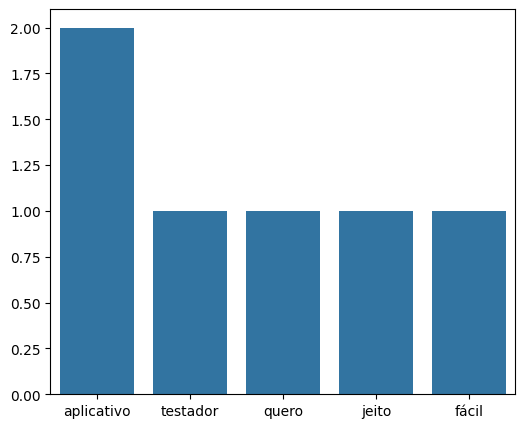

In [117]:
nome, valor = zip(*freq_dists[0].most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)
plt.show()

<Axes: >

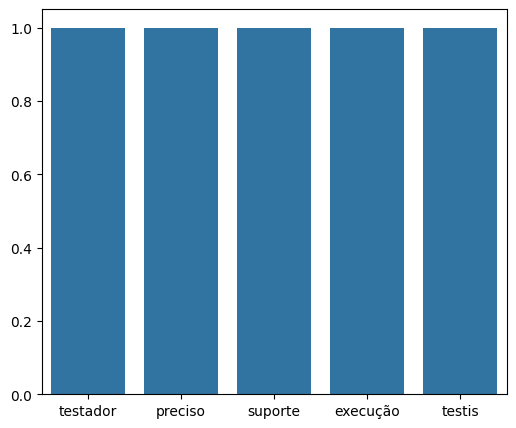

In [118]:
nome,valor = zip(*freq_dist.most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)

In [119]:
for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    result = classifier(historia_usuario, candidate_labels=candidate_labels)
    top_label = result['labels'][0]
    confidence = result['scores'][0]
    print(f"História de Usuário {i+1}: Rótulo Previsto: {top_label}, Confiança: {confidence:.2f}")

História de Usuário 1: Rótulo Previsto: testador, Confiança: 0.51
História de Usuário 2: Rótulo Previsto: testador, Confiança: 0.68
História de Usuário 3: Rótulo Previsto: testador, Confiança: 0.58
História de Usuário 4: Rótulo Previsto: testador, Confiança: 0.62
História de Usuário 5: Rótulo Previsto: testador, Confiança: 0.63
História de Usuário 6: Rótulo Previsto: testador, Confiança: 0.92
História de Usuário 7: Rótulo Previsto: testador, Confiança: 0.79
História de Usuário 8: Rótulo Previsto: testador, Confiança: 0.70
História de Usuário 9: Rótulo Previsto: testador, Confiança: 0.83
História de Usuário 10: Rótulo Previsto: testador, Confiança: 0.81
História de Usuário 11: Rótulo Previsto: testador, Confiança: 0.57
História de Usuário 12: Rótulo Previsto: testador, Confiança: 0.67
História de Usuário 13: Rótulo Previsto: testador, Confiança: 0.80
História de Usuário 14: Rótulo Previsto: testador, Confiança: 0.70
História de Usuário 15: Rótulo Previsto: testador, Confiança: 0.79
Hist

In [120]:
roberta(f"Resultado: {freq_dists}")

[{'entity_group': 'LABEL_1',
  'score': 0.56435573,
  'word': ' resultado :',
  'start': 0,
  'end': 10},
 {'entity_group': 'LABEL_0',
  'score': 0.59582937,
  'word': ' [',
  'start': 12,
  'end': 12},
 {'entity_group': 'LABEL_1',
  'score': 0.54507595,
  'word': ' freqdis',
  'start': 13,
  'end': 19},
 {'entity_group': 'LABEL_0',
  'score': 0.5812671,
  'word': 't',
  'start': 19,
  'end': 20},
 {'entity_group': 'LABEL_1',
  'score': 0.60263604,
  'word': ' (',
  'start': 21,
  'end': 21},
 {'entity_group': 'LABEL_0',
  'score': 0.5339283,
  'word': " { '",
  'start': 22,
  'end': 23},
 {'entity_group': 'LABEL_1',
  'score': 0.6378029,
  'word': ' aplica',
  'start': 24,
  'end': 29},
 {'entity_group': 'LABEL_0',
  'score': 0.5723716,
  'word': "tivo '",
  'start': 29,
  'end': 34},
 {'entity_group': 'LABEL_1',
  'score': 0.6084046,
  'word': ' : 2 ,',
  'start': 35,
  'end': 38},
 {'entity_group': 'LABEL_0',
  'score': 0.57676196,
  'word': " ' testador '",
  'start': 40,
  'end': 

In [121]:
for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    result = roberta(f"História de Usuário {i+1}: {historia_usuario}")
    print(f"Resultado para História de Usuário {i+1}: {result}")

Resultado para História de Usuário 1: [{'entity_group': 'LABEL_1', 'score': 0.59787536, 'word': ' historia de', 'start': 0, 'end': 11}, {'entity_group': 'LABEL_0', 'score': 0.53177094, 'word': ' usuario', 'start': 13, 'end': 19}, {'entity_group': 'LABEL_1', 'score': 0.6019137, 'word': ' 1 : tes', 'start': 21, 'end': 26}, {'entity_group': 'LABEL_0', 'score': 0.51160455, 'word': 'tador', 'start': 26, 'end': 31}, {'entity_group': 'LABEL_1', 'score': 0.63626343, 'word': ' quero jeito facil incluir requisitos aplica', 'start': 33, 'end': 75}, {'entity_group': 'LABEL_0', 'score': 0.50638914, 'word': 'tivo', 'start': 75, 'end': 79}, {'entity_group': 'LABEL_1', 'score': 0.6182089, 'word': ' ferramenta drl - mobtest criar casos', 'start': 81, 'end': 114}, {'entity_group': 'LABEL_0', 'score': 0.57804704, 'word': ' teste', 'start': 116, 'end': 120}, {'entity_group': 'LABEL_1', 'score': 0.53773546, 'word': ' cub', 'start': 122, 'end': 124}, {'entity_group': 'LABEL_0', 'score': 0.5825704, 'word': '

In [122]:
def extract_info(freq_dist):
    freq_dist_text = " ".join(freq_dist.keys())

    autor = None
    if "testador" in freq_dist_text.lower():
        autor = "Testador"

    necessidade = None
    for word in ["quero", "preciso", "desejo"]:
        if word in freq_dist_text.lower():
            pos_inicial = freq_dist_text.lower().find(word) + len(word)
            necessidade = freq_dist_text[pos_inicial:].strip()
            break

    objetivo = None
    if "para" in freq_dist_text.lower():
        pos_inicial = freq_dist_text.lower().find("para") + len("para")
        objetivo = freq_dist_text[pos_inicial:].strip()

    return autor, necessidade, objetivo


for i, freq_dist in enumerate(freq_dists):
    autor, necessidade, objetivo = extract_info(freq_dist)
    print("História do Usuário:", historias_usuario[i])
    print("Autor:", autor)
    print("Necessidade:", necessidade)
    print("Objetivo:", objetivo)
    print()


História do Usuário: Como Testador eu quero um jeito mais fácil de incluir os requisitos do aplicativo na ferramenta DRL-Mobtest para criar casos de teste que cubram tudo que o aplicativo precisa fazer, sem ter que gastar muito tempo escrevendo manualmente.
Autor: Testador
Necessidade: jeito fácil incluir requisitos aplicativo ferramenta drl-mobtest criar casos teste cubram tudo precisa fazer ter gastar tempo escrevendo manualmente
Objetivo: None

História do Usuário: Como Testador eu quero uma maneira de ensinar a ferramenta DRL-Mobtest a entender os requisitos do aplicativo usando NLP para fazer com que a ferramenta gere testes automaticamente.
Autor: Testador
Necessidade: maneira ensinar ferramenta drl-mobtest entender requisitos aplicativo usando nlp fazer gere testis automaticamente
Objetivo: None

História do Usuário: Como Testador eu quero que a ferramenta gere casos de teste abrangentes que cubram integralmente todos os requisitos do aplicativo, assegurando que o software seja 

In [123]:
from sklearn.metrics import recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
!pip install scikit-learn

In [124]:
X = freq_dists
rotulos_possiveis = ["testador", "aplicativo", "execução", "suporte"]
y = [choice(rotulos_possiveis) for _ in range(len(freq_dists))]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(freq_dist.keys()) for freq_dist in X])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42,stratify=y)

In [126]:
clf_tf = DecisionTreeClassifier(criterion='gini',max_depth=15)
clf_tf.fit(X_train, y_train)
pred_arvore_entropy_tf = clf_tf.predict(X_test)
accuracy_decision = accuracy_score(y_test,pred_arvore_entropy_tf)
recall = recall_score(y_test, pred_arvore_entropy_tf, average='weighted')
f1 = f1_score(y_test, pred_arvore_entropy_tf, average='weighted')
print(pred_arvore_entropy_tf)
print(accuracy_decision)
print(recall)
print(f1)

['testador' 'aplicativo' 'testador' 'testador' 'suporte' 'execução'
 'execução' 'aplicativo' 'execução' 'testador' 'suporte' 'aplicativo'
 'suporte' 'aplicativo' 'testador' 'suporte' 'suporte' 'testador'
 'suporte' 'execução' 'execução' 'suporte']
0.2727272727272727
0.2727272727272727
0.27933884297520656


In [127]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=7)
clf.fit(X_train, y_train)
pred_arvore_entropy = clf.predict(X_test)
accuracy_decision = accuracy_score(y_test,pred_arvore_entropy)
recall_entropy = recall_score(y_test, pred_arvore_entropy, average='weighted')
f1_entropy = f1_score(y_test, pred_arvore_entropy, average='weighted')
print(pred_arvore_entropy_tf)
print(accuracy_decision)
print(recall_entropy)
print(f1_entropy)

['testador' 'aplicativo' 'testador' 'testador' 'suporte' 'execução'
 'execução' 'aplicativo' 'execução' 'testador' 'suporte' 'aplicativo'
 'suporte' 'aplicativo' 'testador' 'suporte' 'suporte' 'testador'
 'suporte' 'execução' 'execução' 'suporte']
0.22727272727272727
0.22727272727272727
0.2529137529137529


In [128]:
clf_tf3 = KNeighborsClassifier(metric='manhattan',n_neighbors=3)
clf_tf3.fit(X_train, y_train)
pred_knn_tf = clf_tf3.predict(X_test)
acuracy_KNN = accuracy_score(y_test,pred_knn_tf)
recall_knn = recall_score(y_test, pred_knn_tf, average='weighted')
f1_knn = f1_score(y_test, pred_knn_tf, average='weighted')
print(pred_knn_tf)
print(acuracy_KNN)
print(recall_knn)
print(f1_knn)

['aplicativo' 'suporte' 'suporte' 'aplicativo' 'suporte' 'aplicativo'
 'aplicativo' 'testador' 'aplicativo' 'suporte' 'suporte' 'aplicativo'
 'execução' 'aplicativo' 'testador' 'aplicativo' 'aplicativo' 'testador'
 'suporte' 'aplicativo' 'execução' 'suporte']
0.18181818181818182
0.18181818181818182
0.15775401069518716


In [129]:
clf_tf4 = KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
clf_tf4.fit(X_train, y_train)
pred_knn_tf2 = clf_tf4.predict(X_test)
acuracy_KNN2 = accuracy_score(y_test,pred_knn_tf2)
recall_knn2 = recall_score(y_test, pred_knn_tf2, average='weighted')
f1_knn2 = f1_score(y_test, pred_knn_tf2, average='weighted')
print(pred_knn_tf)
print(acuracy_KNN)
print(recall_knn2)
print(f1_knn2)

['aplicativo' 'suporte' 'suporte' 'aplicativo' 'suporte' 'aplicativo'
 'aplicativo' 'testador' 'aplicativo' 'suporte' 'suporte' 'aplicativo'
 'execução' 'aplicativo' 'testador' 'aplicativo' 'aplicativo' 'testador'
 'suporte' 'aplicativo' 'execução' 'suporte']
0.18181818181818182
0.22727272727272727
0.21515151515151515


In [130]:
svc = SVC(kernel='linear', C=0.05)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, pred_svc)
recall_svc = recall_score(y_test, pred_svc, average='weighted')
f1_svc = f1_score(y_test, pred_svc, average='weighted')
print(pred_svc)
print(accuracy_svc)
print(recall_svc)
print(f1_svc)


['aplicativo' 'aplicativo' 'aplicativo' 'aplicativo' 'suporte'
 'aplicativo' 'aplicativo' 'aplicativo' 'aplicativo' 'suporte' 'suporte'
 'aplicativo' 'suporte' 'aplicativo' 'aplicativo' 'aplicativo'
 'aplicativo' 'aplicativo' 'suporte' 'aplicativo' 'aplicativo' 'suporte']
0.2727272727272727
0.2727272727272727
0.20857403466099117


In [131]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
import os
import shutil

In [132]:
le_rn = LabelEncoder()
ytrain = le_rn.fit_transform(y_train)
ytest = le_rn.transform(y_test)

In [133]:
Xtrain = np.expand_dims(X_train.toarray(), axis=1)
Xtest = np.expand_dims(X_test.toarray(), axis=1)

In [134]:
num_classes = 4
model = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [135]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
EPOCHS = 20
history = model.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.3907 - accuracy: 0.1875 - val_loss: 1.3838 - val_accuracy: 0.2727
Epoch 2/20
1/1 [==============================] - 0s 75ms/step - loss: 1.3833 - accuracy: 0.3750 - val_loss: 1.3834 - val_accuracy: 0.3182
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 1.3766 - accuracy: 0.6250 - val_loss: 1.3831 - val_accuracy: 0.4091
Epoch 4/20
1/1 [==============================] - 0s 70ms/step - loss: 1.3704 - accuracy: 0.7188 - val_loss: 1.3828 - val_accuracy: 0.4091
Epoch 5/20
1/1 [==============================] - 0s 71ms/step - loss: 1.3642 - accuracy: 0.7500 - val_loss: 1.3826 - val_accuracy: 0.4091
Epoch 6/20
1/1 [==============================] - 0s 66ms/step - loss: 1.3582 - accuracy: 0.7812 - val_loss: 1.3824 - val_accuracy: 0.4091
Epoch 7/20
1/1 [==============================] - 0s 71ms/step - loss: 1.3521 - accuracy: 0.7812 - val_loss: 1.3823 - val_accuracy: 0.4091
Epoch 8/20
1/1 [=============

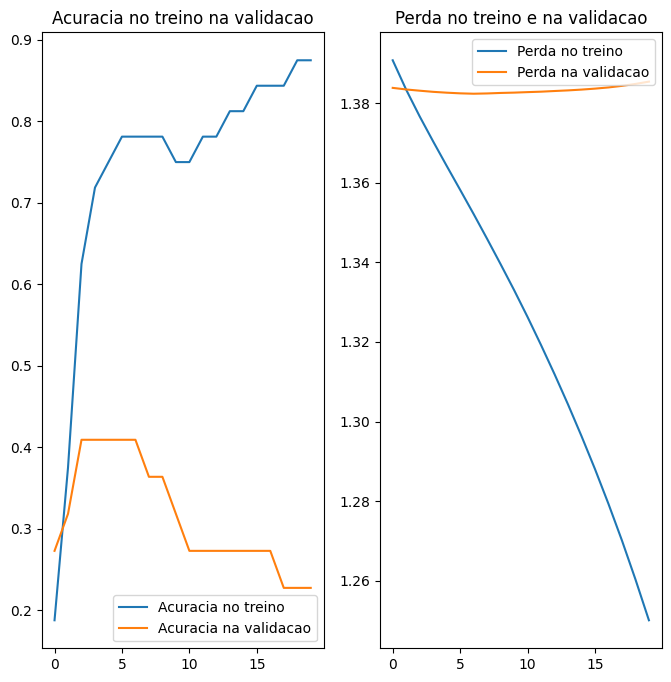

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acuracia no treino')
plt.plot(epochs_range, val_acc, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda no treino')
plt.plot(epochs_range, val_loss, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()


In [138]:
model_drop = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [139]:
model_drop.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [140]:
EPOCHS = 20
history_drop = model_drop.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.3875 - accuracy: 0.3125 - val_loss: 1.3871 - val_accuracy: 0.3182
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 1.3790 - accuracy: 0.3438 - val_loss: 1.3871 - val_accuracy: 0.3636
Epoch 3/20
1/1 [==============================] - 0s 63ms/step - loss: 1.3733 - accuracy: 0.4688 - val_loss: 1.3871 - val_accuracy: 0.2727
Epoch 4/20
1/1 [==============================] - 0s 47ms/step - loss: 1.3670 - accuracy: 0.5938 - val_loss: 1.3871 - val_accuracy: 0.2727
Epoch 5/20
1/1 [==============================] - 0s 63ms/step - loss: 1.3684 - accuracy: 0.5625 - val_loss: 1.3872 - val_accuracy: 0.2273
Epoch 6/20
1/1 [==============================] - 0s 61ms/step - loss: 1.3609 - accuracy: 0.6562 - val_loss: 1.3873 - val_accuracy: 0.2273
Epoch 7/20
1/1 [==============================] - 0s 72ms/step - loss: 1.3565 - accuracy: 0.6875 - val_loss: 1.3873 - val_accuracy: 0.2727
Epoch 8/20
1/1 [=============

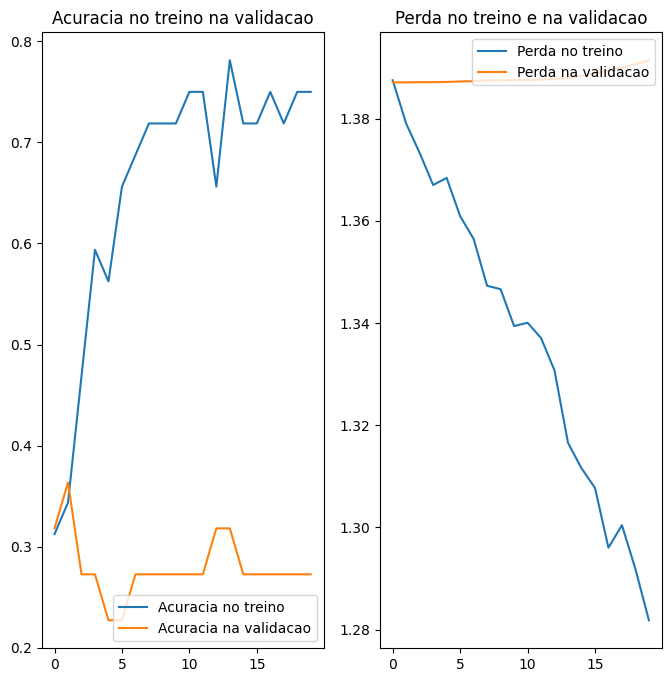

In [141]:
acc2 = history_drop.history['accuracy']
val_acc2 = history_drop.history['val_accuracy']
loss2 = history_drop.history['loss']
val_loss2 = history_drop.history['val_loss']

epochs_range = range(len(acc2))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Acuracia no treino')
plt.plot(epochs_range, val_acc2, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Perda no treino')
plt.plot(epochs_range, val_loss2, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()


In [142]:
model_early = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [143]:
model_early.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [144]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=5,
        restore_best_weights=True,
        verbose=1,
    )
]

In [145]:
EPOCHS = 100
history_early = model_early.fit(Xtrain, ytrain,callbacks = callbacks, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.3891 - accuracy: 0.1250 - val_loss: 1.3846 - val_accuracy: 0.3182
Epoch 2/100
1/1 [==============================] - 0s 131ms/step - loss: 1.3828 - accuracy: 0.3750 - val_loss: 1.3843 - val_accuracy: 0.3182
Epoch 3/100
1/1 [==============================] - 0s 119ms/step - loss: 1.3772 - accuracy: 0.5000 - val_loss: 1.3841 - val_accuracy: 0.3182
Epoch 4/100
1/1 [==============================] - 0s 130ms/step - loss: 1.3720 - accuracy: 0.5312 - val_loss: 1.3840 - val_accuracy: 0.3182
Epoch 5/100
1/1 [==============================] - 0s 129ms/step - loss: 1.3669 - accuracy: 0.6562 - val_loss: 1.3839 - val_accuracy: 0.3182
Epoch 6/100
1/1 [==============================] - 0s 111ms/step - loss: 1.3617 - accuracy: 0.7188 - val_loss: 1.3837 - val_accuracy: 0.2727
Epoch 6: early stopping


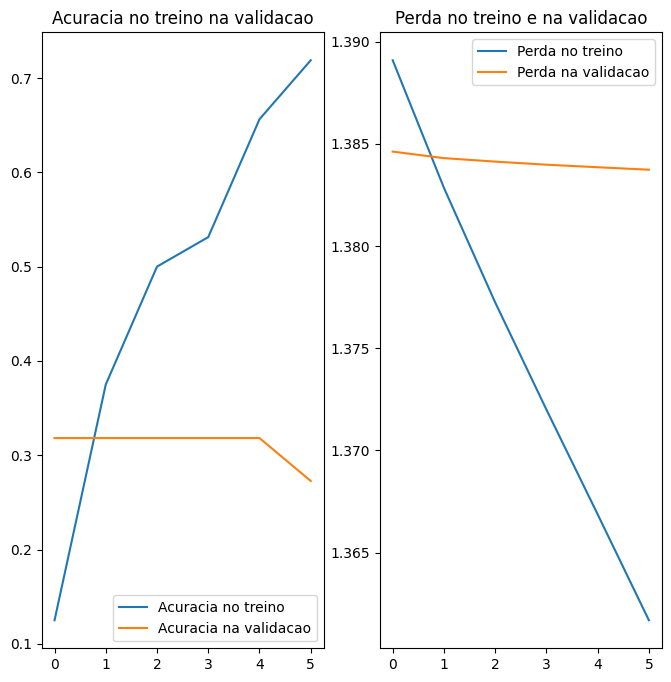

In [146]:
acc3 = history_early.history['accuracy']
val_acc3 = history_early.history['val_accuracy']
loss3 = history_early.history['loss']
val_loss3 = history_early.history['val_loss']

epochs_range = range(len(acc3))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Acuracia no treino')
plt.plot(epochs_range, val_acc3, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Perda no treino')
plt.plot(epochs_range, val_loss3, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()

In [147]:
model_few = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model_few.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
EPOCHS = 20
history_few = model_few.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.3865 - accuracy: 0.1562 - val_loss: 1.3898 - val_accuracy: 0.0909
Epoch 2/20
1/1 [==============================] - 0s 71ms/step - loss: 1.3794 - accuracy: 0.3750 - val_loss: 1.3898 - val_accuracy: 0.1364
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 1.3724 - accuracy: 0.7188 - val_loss: 1.3899 - val_accuracy: 0.1364
Epoch 4/20
1/1 [==============================] - 0s 84ms/step - loss: 1.3657 - accuracy: 0.7500 - val_loss: 1.3900 - val_accuracy: 0.1818
Epoch 5/20
1/1 [==============================] - 0s 88ms/step - loss: 1.3591 - accuracy: 0.7812 - val_loss: 1.3900 - val_accuracy: 0.1818
Epoch 6/20
1/1 [==============================] - 0s 78ms/step - loss: 1.3525 - accuracy: 0.8125 - val_loss: 1.3902 - val_accuracy: 0.1818
Epoch 7/20
1/1 [==============================] - 0s 123ms/step - loss: 1.3457 - accuracy: 0.8438 - val_loss: 1.3904 - val_accuracy: 0.1818
Epoch 8/20
1/1 [============

In [148]:
X = freq_dists
rotulos_possiveis = ["testador", "aplicativo", "execução", "suporte"]
y = [choice(rotulos_possiveis) for _ in range(len(freq_dists))]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(freq_dist.keys()) for freq_dist in X])


X_novos = csr_matrix(X)
X_novos.sort_indices()


X_novos = np.expand_dims(X_novos.toarray(), axis=1)

y_novos = le_rn.transform([choice(rotulos_possiveis) for _ in range(len(y))])

EPOCHS = 20
history_few = model_few.fit(X_novos, y_novos, epochs=EPOCHS, batch_size=32, validation_split=0.2)


Epoch 1/20
2/2 [==============================] - 3s 142ms/step - loss: 1.3827 - accuracy: 0.2558 - val_loss: 1.3712 - val_accuracy: 0.3636
Epoch 2/20
2/2 [==============================] - 0s 148ms/step - loss: 1.3770 - accuracy: 0.2558 - val_loss: 1.3690 - val_accuracy: 0.3636
Epoch 3/20
2/2 [==============================] - 0s 194ms/step - loss: 1.3645 - accuracy: 0.2558 - val_loss: 1.3668 - val_accuracy: 0.3636
Epoch 4/20
2/2 [==============================] - 0s 217ms/step - loss: 1.3504 - accuracy: 0.2326 - val_loss: 1.3651 - val_accuracy: 0.3636
Epoch 5/20
2/2 [==============================] - 0s 168ms/step - loss: 1.3346 - accuracy: 0.2558 - val_loss: 1.3626 - val_accuracy: 0.3636
Epoch 6/20
2/2 [==============================] - 0s 169ms/step - loss: 1.3186 - accuracy: 0.2558 - val_loss: 1.3607 - val_accuracy: 0.3636
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 1.3004 - accuracy: 0.3256 - val_loss: 1.3590 - val_accuracy: 0.3636
Epoch 8/20
2/2 [=====